# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# write the code for reading the dataset INNHotelsGroup.csv
visa_data = pd.read_csv(r'/content/drive/MyDrive/EasyVisa.csv')
print(visa_data)

         case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                        

## Data Overview

- Observations
- Sanity checks

In [4]:
#checking the Shape of the Dataset
visa_data.shape

(25480, 12)

In [5]:
#Let's view the 1st 10 rows of dataset
visa_data.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [6]:
#Let's view the last 10 rows of dataset
visa_data.tail(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25471,EZYV25472,Asia,High School,N,N,40224,1962,Island,75587.4200,Year,Y,Certified
25472,EZYV25473,Asia,High School,N,N,1346,2003,Midwest,76155.6000,Year,N,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.9100,Year,Y,Certified


In [7]:
#Checking the data type and not null values for each column
visa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Observations
* There are 25480 rows and 12 columns in the data set
* Number of employees and years of establishment are integer  
* prevailing wages is of type float. 
* All other attributes are of object type 
* All the data are non-null

In [8]:
#Checking the distribution of the numeric data
visa_data.describe() 

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [9]:
#Checking the distribution of the categorical data
visa_data.describe(include=object) 

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480,25480,25480,25480
unique,25480,6,4,2,2,5,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,Northeast,Year,Y,Certified
freq,1,16861,10234,14802,22525,7195,22962,22773,17018



### Observations from both numeric and categorical data
* There are negative value in the no of employee column which is abnormal. The mean number of employee is 5667
* The minimum prevailing wages is 2.14 which is too small and probably not valid, the mean is wage is 74455.81 and the maximum wages is 319210.
* Year of establishment started from 1800 to 2016
* The case ID is unique for every row, this will be dropped
* There 4 categories of employee educatin and most have bachelor's degree about 10234
* Most of the employment region are northeast, over 7000
* 17018 of the visa status are certified.

In [10]:
#Dropping the case ID
visa_data.drop(['case_id'],axis=1,inplace=True)

In [11]:
#Removing negative entries for no_of_employees
visa_data.drop(visa_data[(visa_data["no_of_employees"]<=0)].index, inplace=True)

In [12]:
visa_data.describe() 

,no_of_employees,yr_of_estab,prevailing_wage
count,25447.000000,25447.000000,25447.000000
mean,5674.415334,1979.394506,74468.281479
std,22891.842245,42.385932,52822.177370
min,12.000000,1800.000000,2.136700
25%,1025.000000,1976.000000,34039.210000
50%,2112.000000,1997.000000,70312.500000
75%,3506.500000,2005.000000,107739.505000
max,602069.000000,2016.000000,319210.270000


* There are no more negative entries in the no of employees

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Data Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
  
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5,))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

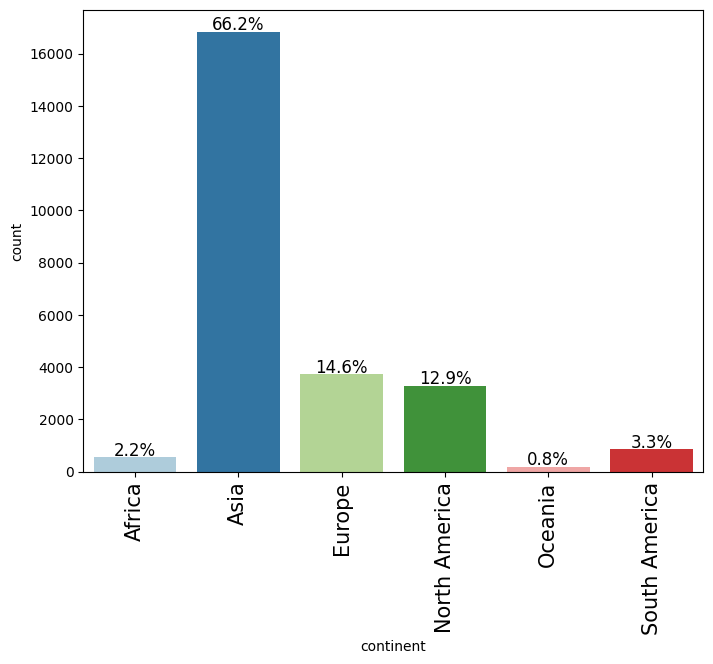

In [16]:
#plotting the continent
labeled_barplot(visa_data, "continent", perc=True)

66.2% of the employee are from Asia, follow by Europe 14.6%

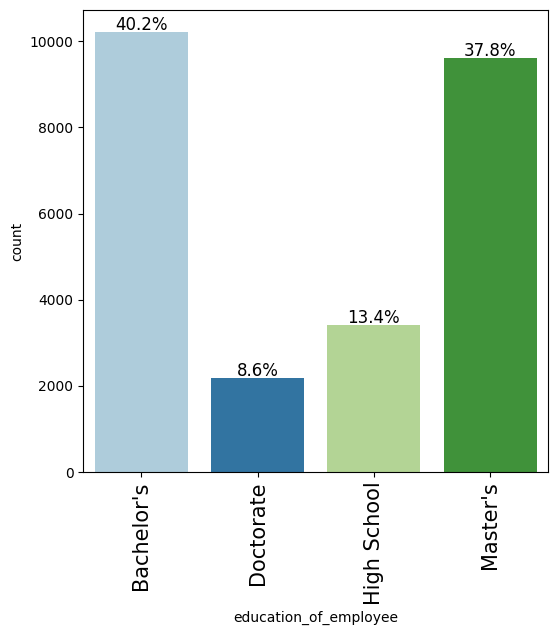

In [17]:
#Plotting the education
labeled_barplot(visa_data, "education_of_employee", perc=True)

Most of employees have either a bachelor's 40% or a master's 38% and minority of applicants have either a doctorate 8% or only a high school diploma 13%

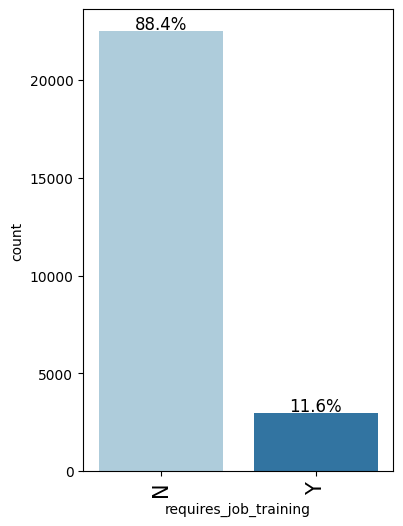

In [18]:
labeled_barplot(visa_data, "requires_job_training", perc=True)

88% of the employee requires no training

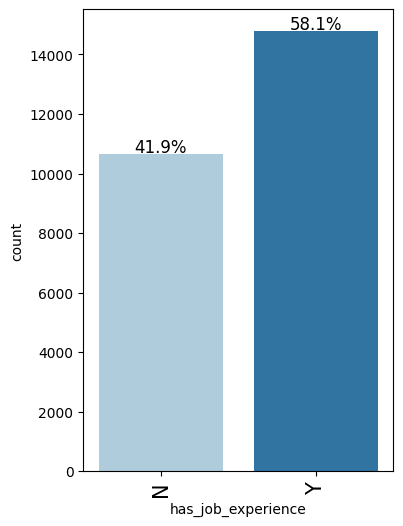

In [19]:
#plotting the job_experience
labeled_barplot(visa_data, "has_job_experience", perc=True)

About 58% employees have job experience and 42% employees do not. althought we see above that 88% requires no training that means some jobs requires no job experience.

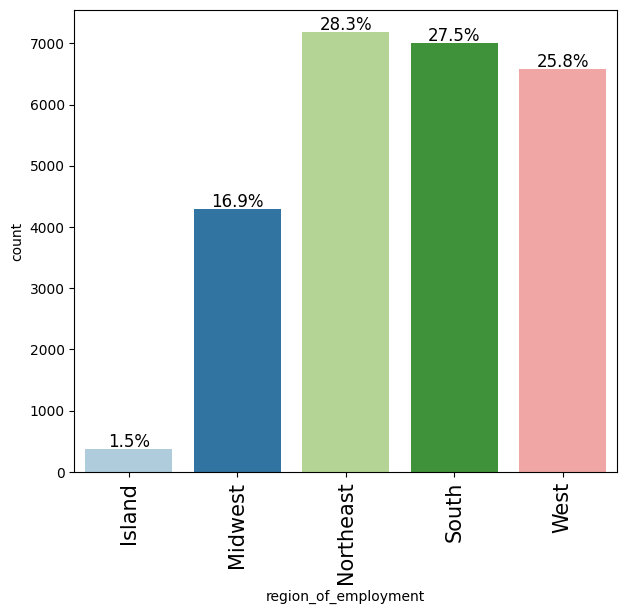

In [20]:
# region_of_employment 
labeled_barplot(visa_data, "region_of_employment", perc=True)

* most of the employment oppotunity and in northeast, followed by south and west

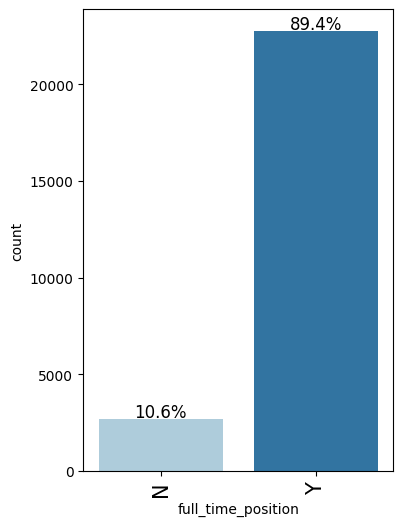

In [21]:
#plotting the full_time_position
labeled_barplot(visa_data, "full_time_position", perc=True)

* 89.4% of the employment are full time positions

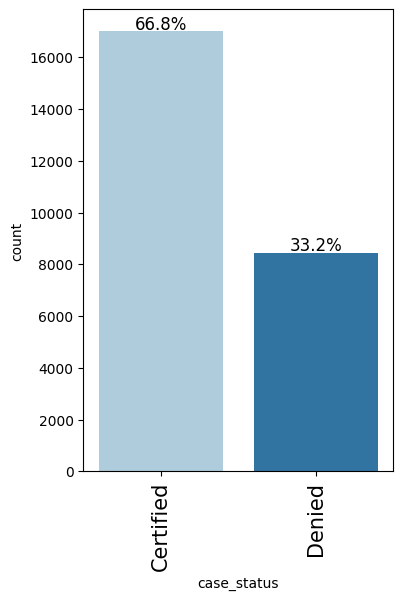

In [22]:
#case_status
labeled_barplot(visa_data, "case_status", perc=True)

66.8% cases are certified and 33.2% cases are denied

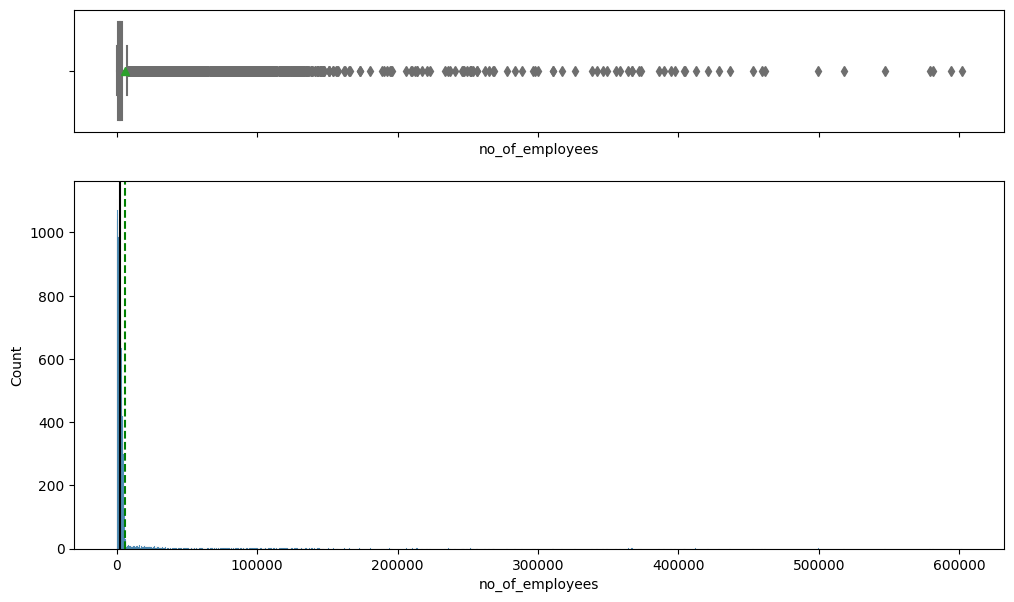

In [23]:
#Checking the distribution of no_of_employees
histogram_boxplot(visa_data, "no_of_employees")

* The distribution of the number of employees skewed to the right

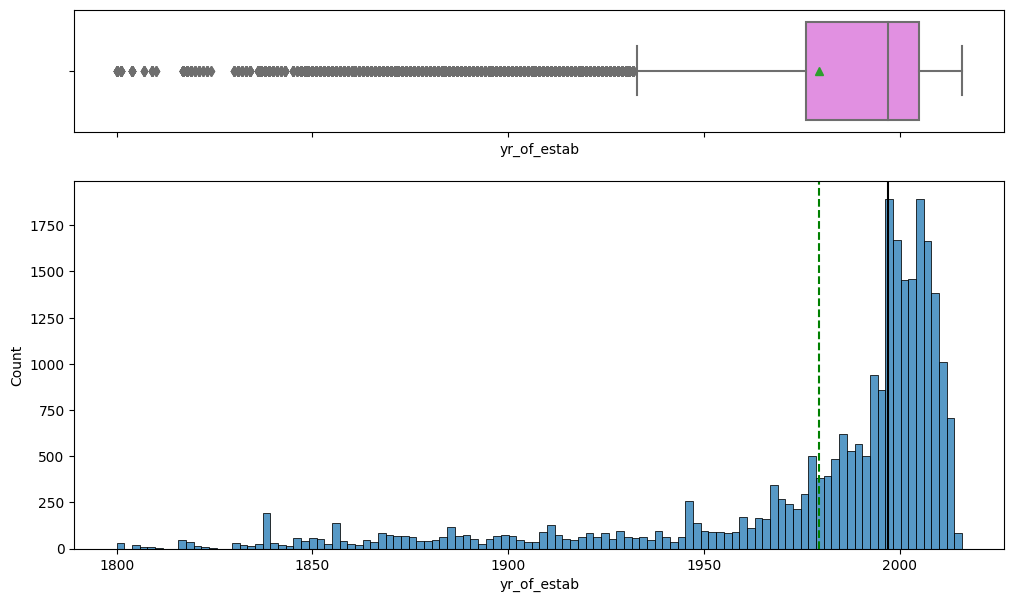

In [24]:
#Distribution of year_of_establishment
histogram_boxplot(visa_data, "yr_of_estab")

* The destribution of the year of establishment skewed to the left

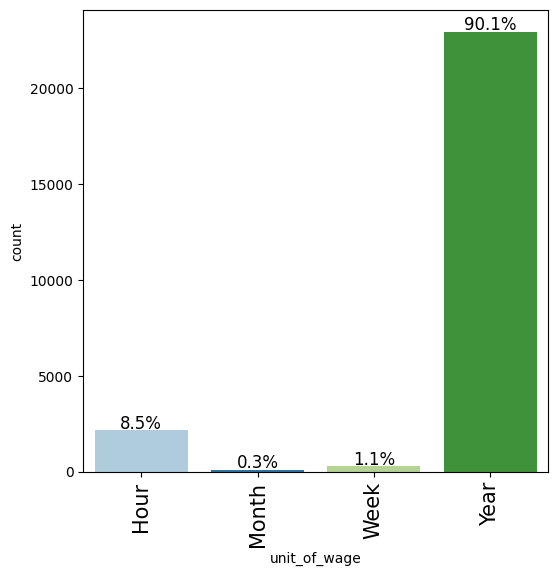

In [25]:
labeled_barplot(visa_data, "unit_of_wage", perc=True);

* Aprroximately 90% of the unit_of_wages are yearly while 8.5% are hourly, 0.3% are monthly and 1.1% are weekly.

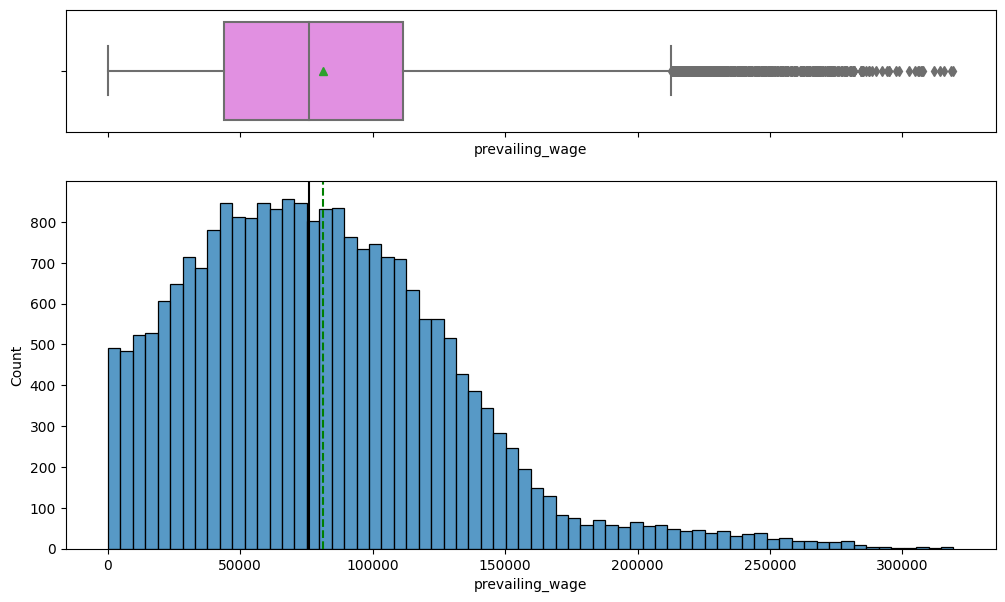

In [26]:
# Distribution of the annual unit_of_wage
histogram_boxplot(visa_data[(visa_data["unit_of_wage"]=="Year")], "prevailing_wage")

* the mean annual salary is aproximately 70,000
* Few people are earning 200000 and above

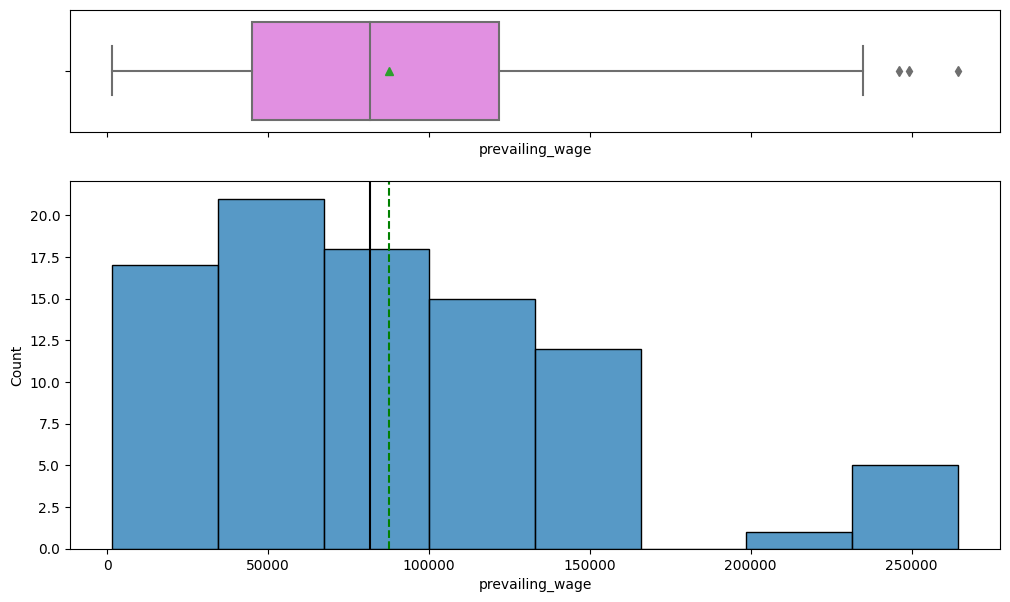

In [27]:
# Distribution of the monthly unit_of_wage
histogram_boxplot(visa_data[(visa_data["unit_of_wage"]=="Month")], "prevailing_wage")

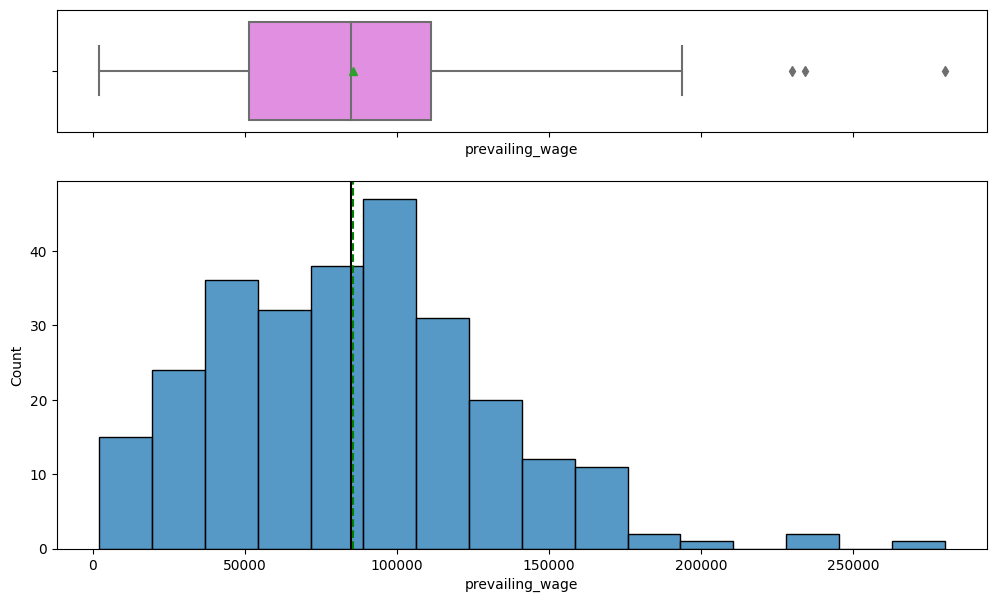

In [28]:
histogram_boxplot(visa_data[(visa_data["unit_of_wage"]=="Week")], "prevailing_wage")

* the average monthly and weekly wages are very close in value to the annual average. this value looks incorrect.

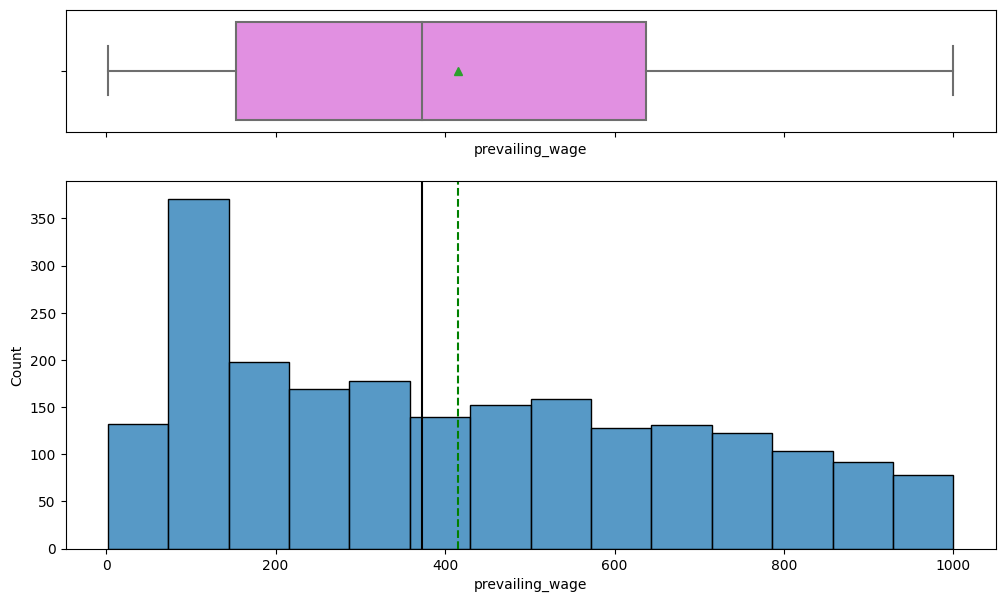

In [29]:
#Observations specifically on data where unit_of_wage is hourly 
histogram_boxplot(visa_data[visa_data["unit_of_wage"]=="Hour"], "prevailing_wage")

* When the unit wages is hours, The average hourly prevailing wages above is close to 400 which looks impossible in real life. this is likely the weekly wages
* It appear that this data is very unclean and might not be use directly like that.
* Since the prevailing wages are in annual and weekly, it will be clean up to contain only the annual wages for uniformity.

Let's make the prevailing wages to be inform of yearly only and make unit of wages to be in hourly and non hourly

In [30]:
# Changing the prevailing wages to contain only annual, assuming 52 weeks a year
visa_data.loc[visa_data["unit_of_wage"]=="Hour", "prevailing_wage"] = \
visa_data.loc[visa_data["unit_of_wage"]=="Hour", "prevailing_wage"]*52


In [31]:
# converting the unit of wages to Hourly and Not hourly
visa_data["unit_of_wage"] = visa_data["unit_of_wage"].astype('object')
visa_data.loc[visa_data["unit_of_wage"]=="Hour", "unit_of_wage"] = "Hourly"
visa_data.loc[visa_data["unit_of_wage"]=="Week", "unit_of_wage"] = "Not_Hourly"
visa_data.loc[visa_data["unit_of_wage"]=="Month", "unit_of_wage"] = "Not_Hourly"
visa_data.loc[visa_data["unit_of_wage"]=="Year", "unit_of_wage"] = "Not_Hourly"
visa_data["unit_of_wage"] = visa_data["unit_of_wage"].astype('category')

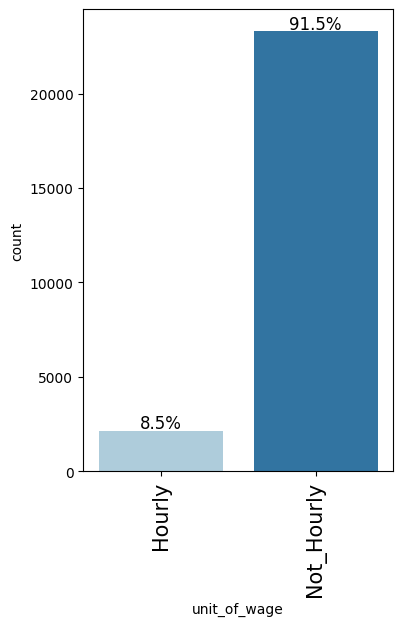

In [32]:
labeled_barplot(visa_data, "unit_of_wage", perc=True)

91.5% are not hourly

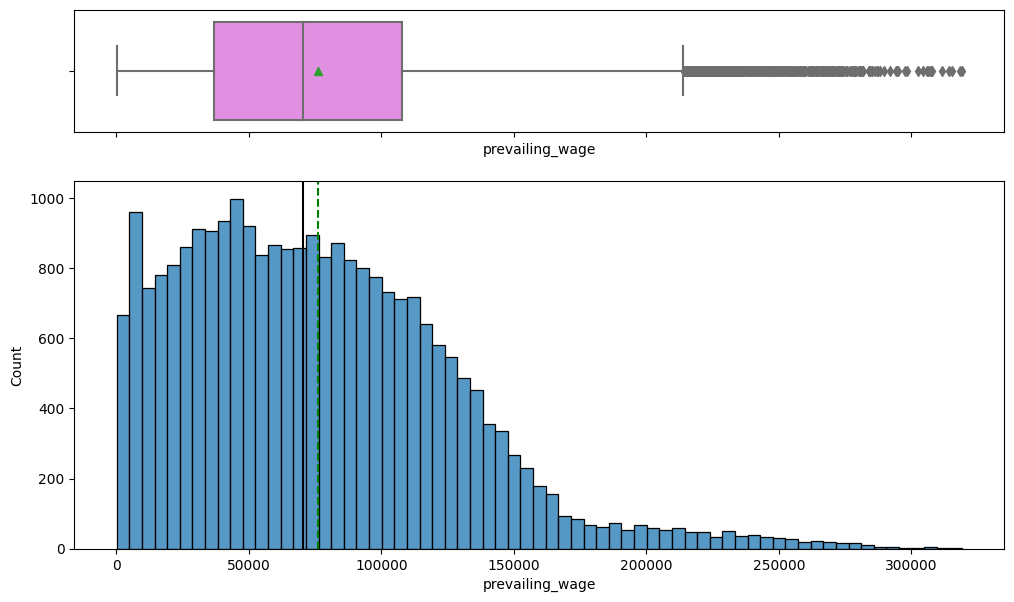

In [33]:
histogram_boxplot(visa_data, "prevailing_wage")

Bivariate Analysis

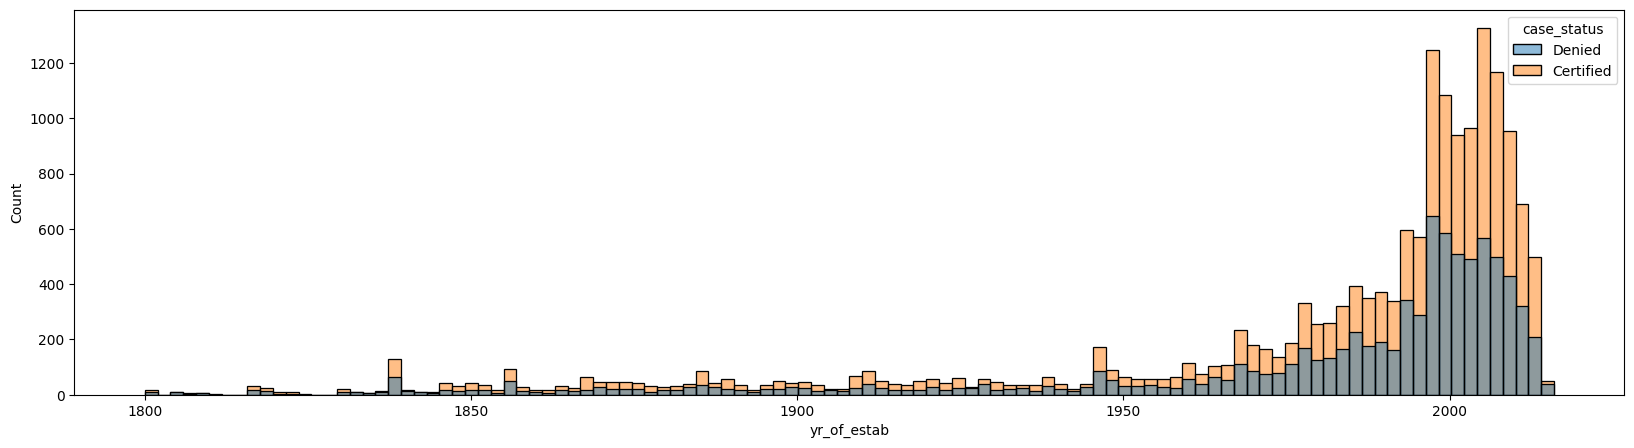

In [34]:
#year of establishment vs case_status
plt.figure(figsize=(20,5))
sns.histplot(visa_data, x="yr_of_estab", hue="case_status");

* Case status doesn't really depend on the year of establishment because most of the employee are certified across irrespective of year
* There are outliers at the lower end of the data

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Not_Hourly        16254    7040  23294
Hourly              747    1406   2153
------------------------------------------------------------------------------------------------------------------------


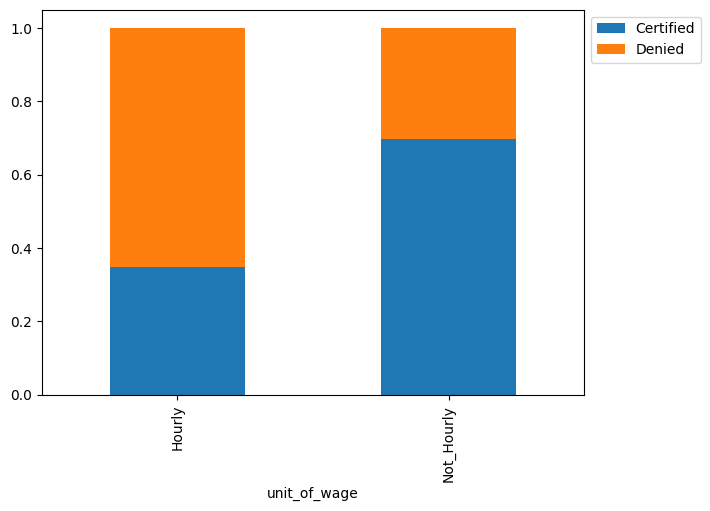

In [35]:
stacked_barplot(visa_data, "unit_of_wage", "case_status")

* 16254 out of 23294 which is about 70% are certified when the unit of wages are not hourly.
* only 35% are certified when the unit of wages is hourly

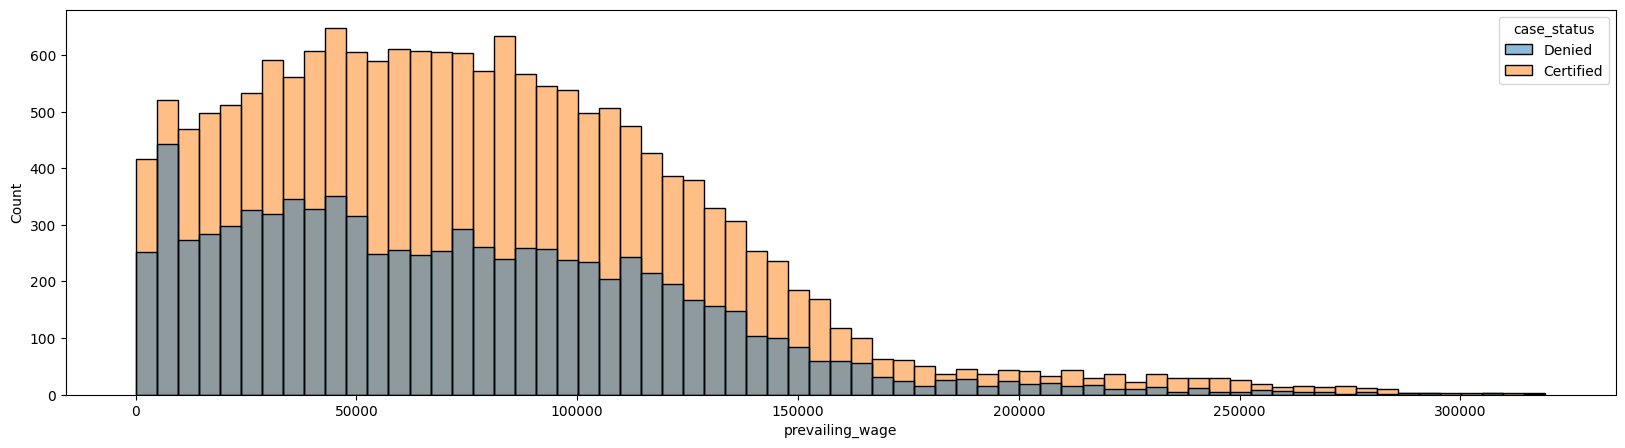

In [36]:
# prevailing_wage vs case_status
plt.figure(figsize=(20,5))
sns.histplot(visa_data, x="prevailing_wage", hue="case_status");

* suprisingly there are some few outliers at the second bar in the histogram above, many cases were denied
* Also at the higher prevailing wages above 250000, many cases were surprisingly certified


case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


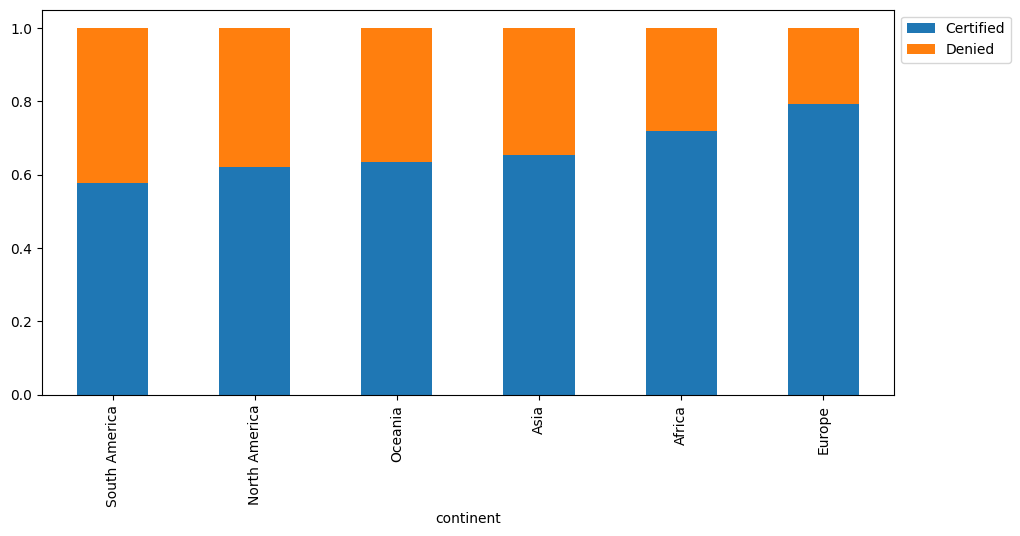

In [37]:
# continent vs case status
stacked_barplot(visa_data, "continent", "case_status")

* certified cases doesn't depend on the region
* Europe has more percentage certified followed by Africa

case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


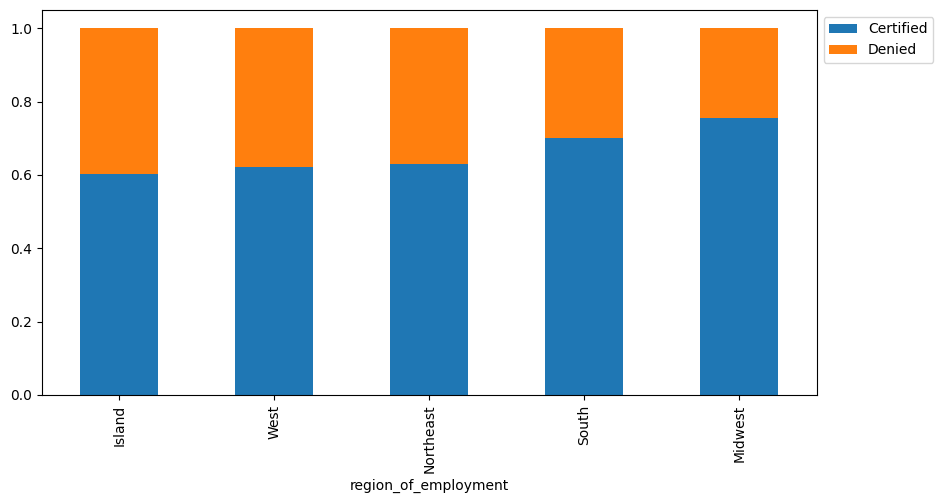

In [38]:
# education vs case status
stacked_barplot(visa_data, "region_of_employment", "case_status")

* Visa within the Midwest and south region have the highest probability over 70% of certification.
* The employer within the Northeast, West, and Island regions have lower chances slightly above 60% of visa certification.

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


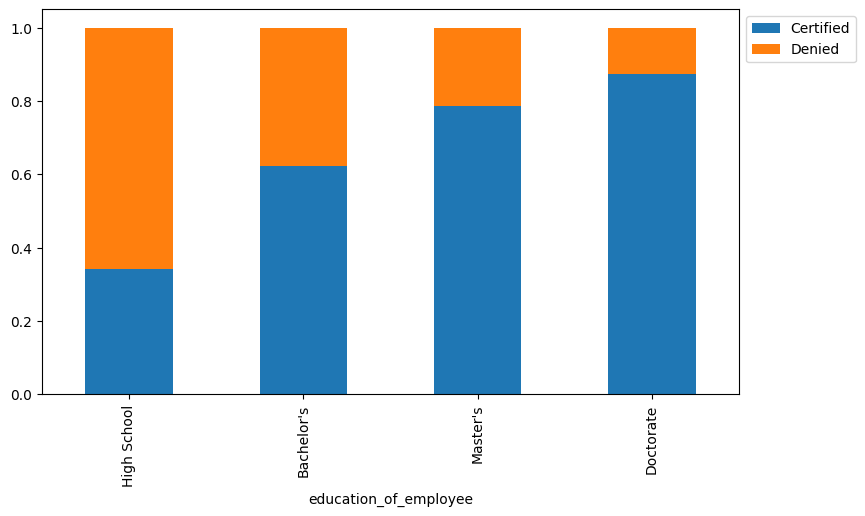

In [39]:
# education vs case status
stacked_barplot(visa_data, "education_of_employee", "case_status")

* Doctorate has more certified cases followed by Masters, bacheclors and High school

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


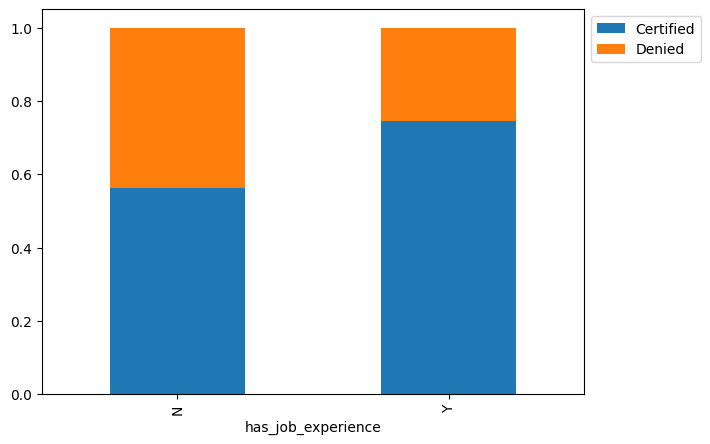

In [40]:
# job_experience vs case status
stacked_barplot(visa_data, "has_job_experience", "case_status")

* experience people has more certified cases that people without experience

case_status            Certified  Denied    All
requires_job_training                          
All                        17001    8446  25447
N                          15000    7498  22498
Y                           2001     948   2949
------------------------------------------------------------------------------------------------------------------------


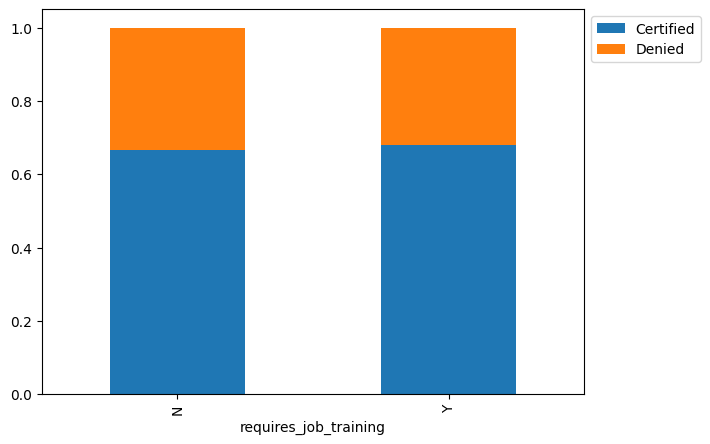

In [41]:
# job training vs case status
stacked_barplot(visa_data, "requires_job_training", "case_status")

case_status            Certified  Denied    All
requires_job_training                          
All                        17001    8446  25447
N                          15000    7498  22498
Y                           2001     948   2949
------------------------------------------------------------------------------------------------------------------------


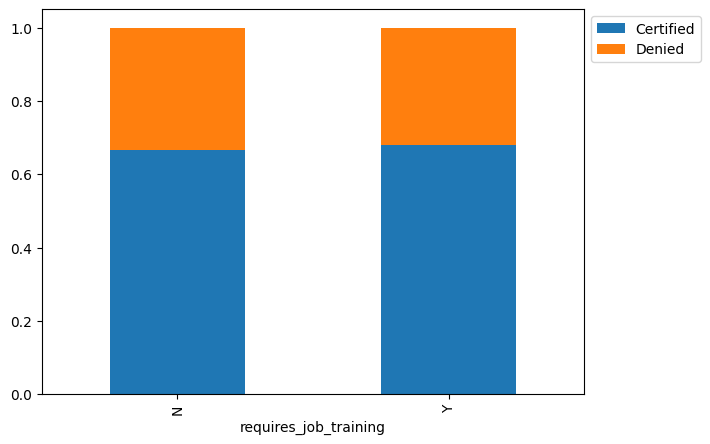

In [42]:
# requires job training vs case status
stacked_barplot(visa_data, "requires_job_training", "case_status")

* There is no difference in the visa application status of those who require training and those who did not.

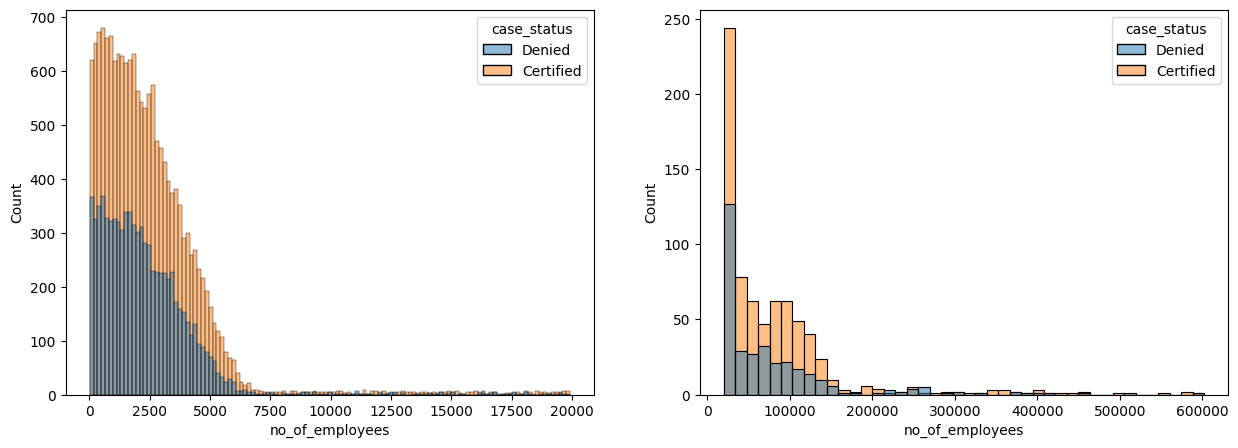

In [43]:
# number of employees vs case status
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=visa_data[visa_data["no_of_employees"]<20000], x="no_of_employees", hue="case_status", ax=ax[0]);
sns.histplot(data=visa_data[visa_data["no_of_employees"]>20000], x="no_of_employees", hue="case_status", ax=ax[1]);

* Both employer with large employees and small employees have similar visa status 

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**Answers**:
1. The higher the level of education the higher the chance of getting visa application approved. Doctorate degree has highest visa certification.
2. The visa status varies across continent by percentage with europe(around 70%) having the highest certified followed by Africa. Europe > Africa > Asia > Oceania > North America & South America
3. People with job experience have higher chance have higher chance of being certified than people with no experience. over 70% of people with experience got certified but little above 50% of people without experience got certified.
4. wages that are not hourly has higher chance of being certified than hourly unit of wages.
5. Prevailing wages with respect to visa application just show a normal distrition except for few exception at the lower end and at the higher end of above 250,000

##  Observation Summary

* 66.2% of the employee are from Asia, follow by Europe 14.6%
* Most of employees have either a bachelor's 40% or a master's 38% and minority of applicants have either a doctorate 8% or only a high school diploma 13%.
* 88% of the employee requires no training.
* About 58% employees have job experience and 42% employees do not. althought we see above that 88% requires no training that means some jobs requires no job experience.
* most of the employment oppotunity and in northeast(28.3%), followed by south(27.5%) and west
* 89.4% of the employment are full time positions
* 66.8% cases are certified and 33.2% cases are denied
* Aprroximately 90% of the unit_of_wages are yearly while 8.5% are hourly, 0.3% are monthly and 1.1% are weekly.
*16254 out of 23294 which is about 70% are certified when the unit of wages are not hourly.
* only 35% are certified when the unit of wages is hourly
* Europe(about 76%) has more percentage certified followed by Africa

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [44]:
# checking for duplicate values
visa_data[visa_data.duplicated()].count()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There is no duplicate value in the data

In [45]:
# Checking for missing Value
visa_data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There is no missing data in the data

In [46]:
# Further deviding the no of employees to small sized, medium sized and large sized.
visa_data["no_of_employees"] = pd.cut( visa_data["no_of_employees"], \
                                  [0, 2500, 7500, np.inf], \
                                  labels = ["Small_Sized(<2500employees)", \
                                            "Medium_Sized(2500-7500employees)", \
                                            "Large_Sized(>75000employees)"])
visa_data["no_of_employees"] = visa_data["no_of_employees"].astype("category")

## Checking for outliers

Before checking for outliers, it will be good to convert year of establishment to age of company

In [47]:
# Age of establishment
visa_data["age_of_estab"] = 2016 - visa_data.yr_of_estab

# Drom yr_of_estab
visa_data.drop("yr_of_estab", axis=1, inplace=True)

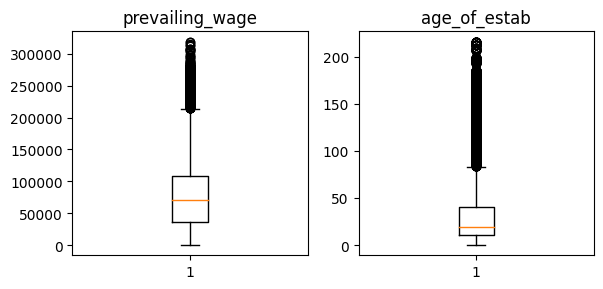

In [48]:
# Create numeric column
num_cols = visa_data.select_dtypes(include=np.number).columns.tolist()

# Use boxplots with 1.5*IQR whiskers for each numeric variable to detect potential outliers
plt.figure(figsize=(9, 3))

for i, variable in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(visa_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* since the prevailing wages has been cleaned, there is no obvious outliers anymore
*There is upper outlier in age of establishment, this can be replaced with the highest year 

In [49]:
# Replace outliers in age_of_estab
visa_data.loc[visa_data.age_of_estab > 200, "age_of_estab"] = visa_data[
    visa_data.age_of_estab <= 200
].age_of_estab.max()

Recheking the outlier

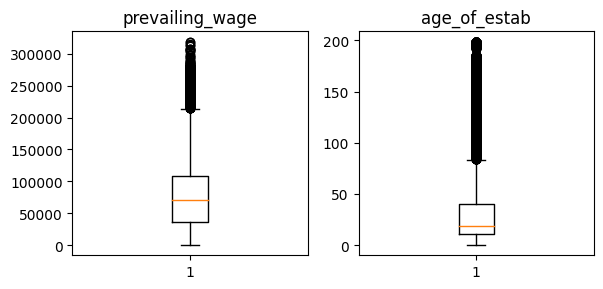

In [50]:
# Create numeric column
num_cols = visa_data.select_dtypes(include=np.number).columns.tolist()

# Use boxplots with 1.5*IQR whiskers for each numeric variable to detect potential outliers
plt.figure(figsize=(9, 3))

for i, variable in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(visa_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Split the dataset

In [51]:
visa_data["case_status"] = visa_data["case_status"].apply(lambda x: 0 if x == "Denied" else 1)

In [52]:
# Splitting the data into input and the target column
X = visa_data.drop("case_status", axis=1)
y = visa_data["case_status"]

In [53]:
X = pd.get_dummies(X, drop_first=True)

In [54]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [55]:
X_train.shape, X_test.shape

((17812, 20), (7635, 20))

* We have 17,812 and 7,635 rows in the train and test datasets

## EDA

- It is a good idea to explore the data once again after manipulating it.

Text(0.5, 1.0, 'Correlation Coefficients')

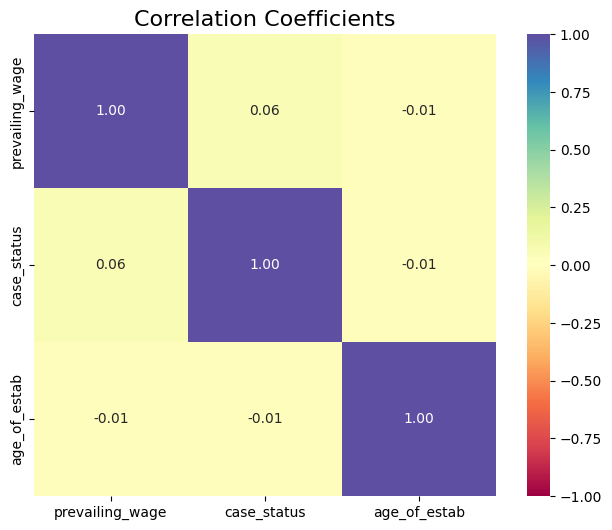

In [56]:
# Creating a numeric data
num_cols = visa_data.select_dtypes(include=np.number).columns.tolist()

# Compute correlation coefficients
cor = visa_data[num_cols].corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))  # set figure size

p = sns.heatmap(
    cor,
    annot=True,
    square=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)  # create heatmap

p.set_title("Correlation Coefficients", fontsize=16)
# set chart's title

* There is no tangible correlation between the variables, the highest is 0.06

## Building bagging and boosting models

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [58]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.654879  0.729465   0.747789  0.738513


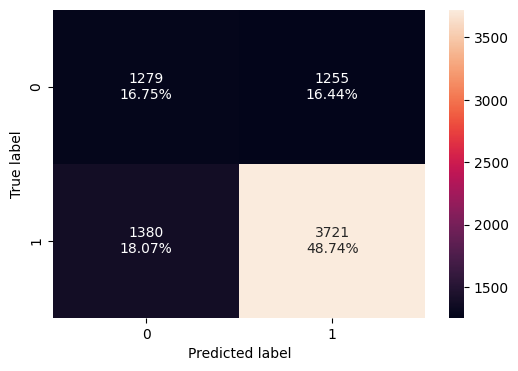

In [59]:
#Fitting decision tree model
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train,y_train)

# Calculating different metrics
decision_tree_model_train_perf=model_performance_classification_sklearn(decision_tree,X_train,y_train)
print("Training performance:\n",decision_tree_model_train_perf)
decision_tree_model_test_perf=model_performance_classification_sklearn(decision_tree,X_test,y_test)
print("Testing performance:\n",decision_tree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(decision_tree,X_test,y_test)

* The Decision Tree model overfit on the training data because it gives 100% accuracy, precision, recall and F1 score. 
* The model gives lower metrics on the test data. the accuracy is 0.65, recall is 0.72 and F1 score is 0.73. 

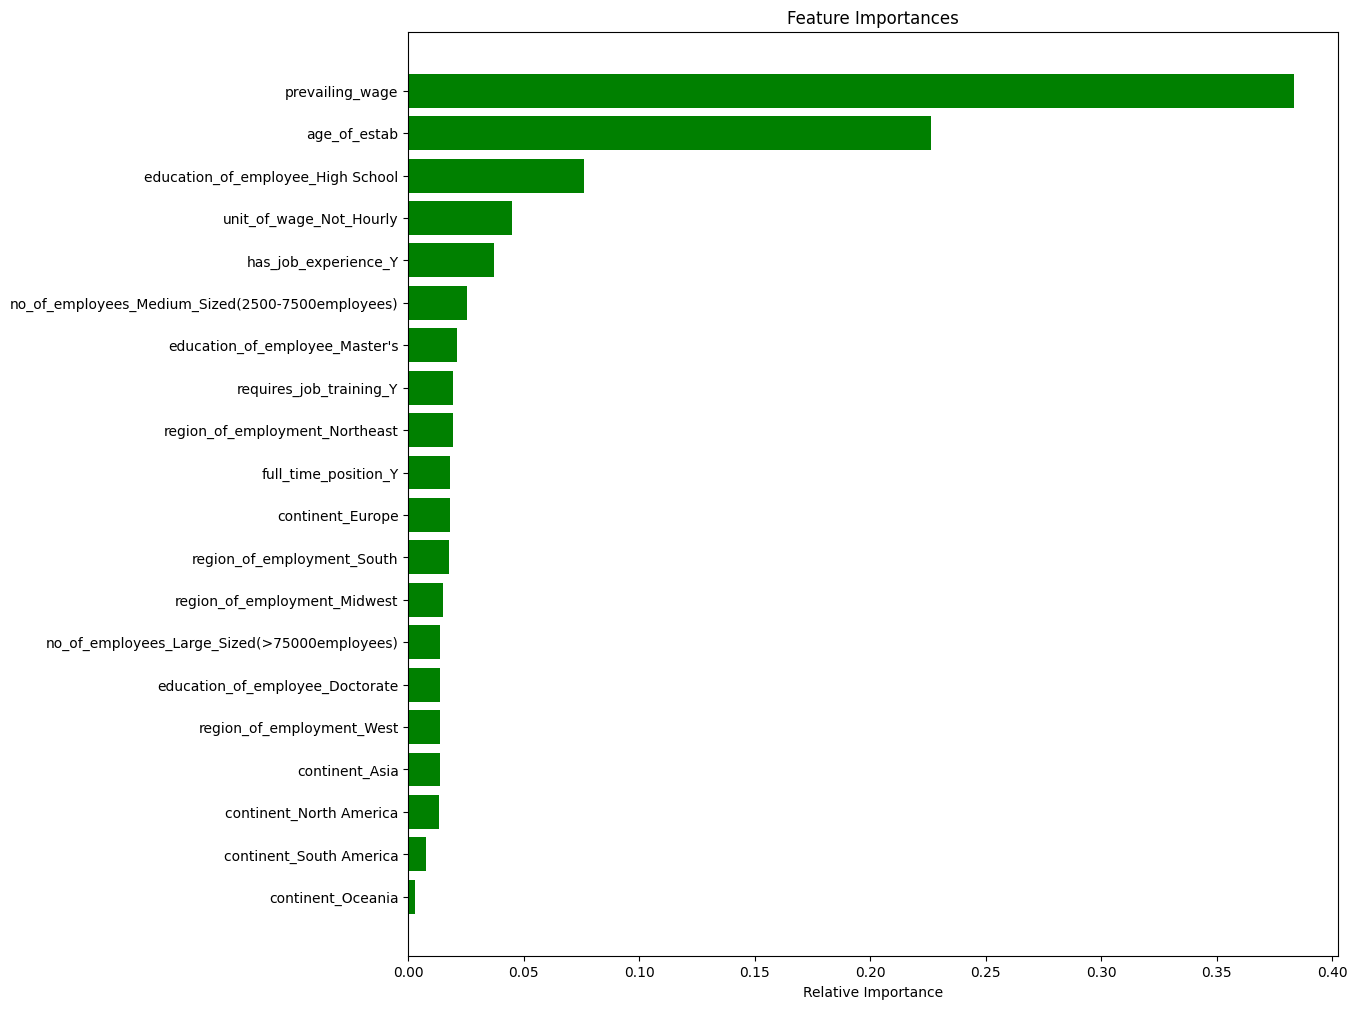

In [60]:
feature_names = X_train.columns
importances = decision_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* prevailing wages, age of establishment and education of employee are the top 3 feature importance

##  Will tuning the hyperparameters improve the model performance?

### Decision Tree Tuned

In [61]:
#Choose the type of classifier. 
decision_tree_estimator = DecisionTreeClassifier(class_weight={0:0.668,1:0.332},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(decision_tree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
decision_tree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
decision_tree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.711599  0.932605   0.719108  0.812059
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.709103  0.929034   0.718248  0.810155


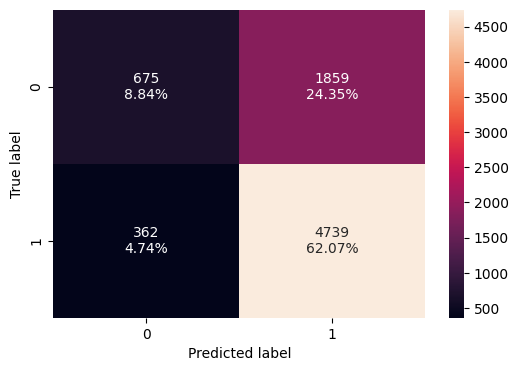

In [62]:
#Calculating different metrics
decision_tree_estimator_model_train_perf=model_performance_classification_sklearn(decision_tree_estimator,X_train,y_train)
print("Training performance:\n",decision_tree_estimator_model_train_perf)
decision_tree_estimator_model_test_perf=model_performance_classification_sklearn(decision_tree_estimator,X_test,y_test)
print("Testing performance:\n",decision_tree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(decision_tree_estimator,X_test,y_test)

The hyperparameter tuned decision tree is not overfiting the dataset, as well the F1 score has improved. F1 score for both the train and test datasets are 0.812 and 0.810 respectively

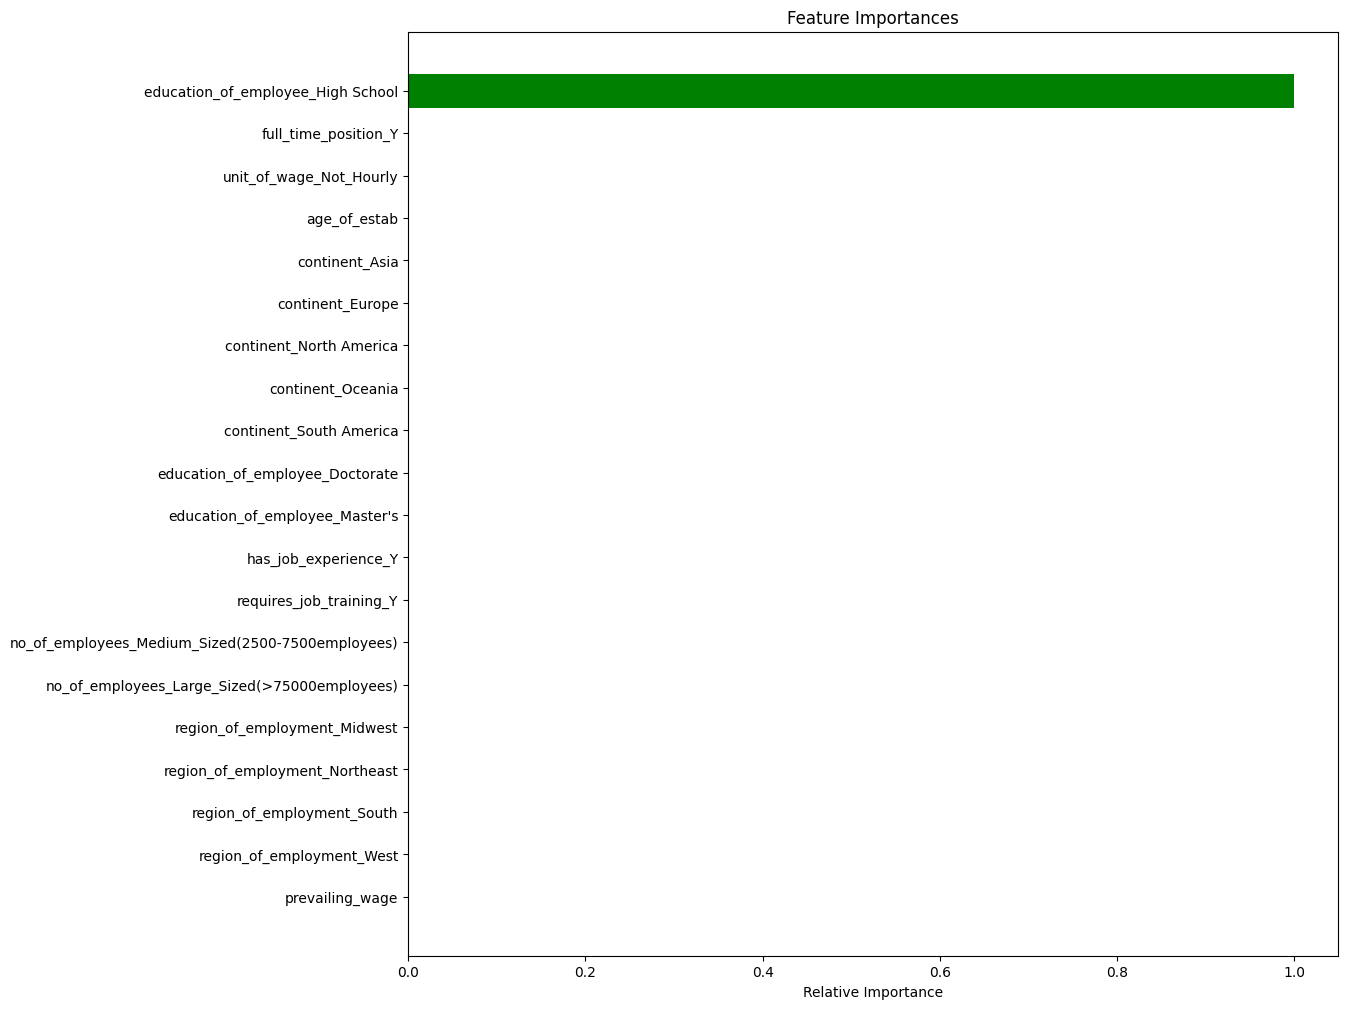

In [63]:
feature_names = X_train.columns
importances = decision_tree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* in the tuned decision tree, education of employee this the only feature importance

## Random Forest

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance:
    Accuracy   Recall  Precision        F1
0   0.71277  0.81435   0.769259  0.791163


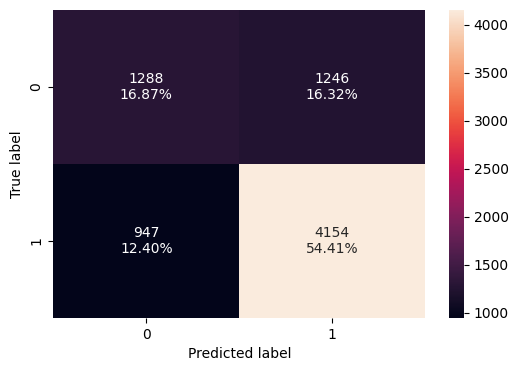

In [64]:
#Fitting the model
random_estimator = RandomForestClassifier(random_state=1)
random_estimator.fit(X_train,y_train)

#Calculating different metrics
random_estimator_model_train_perf=model_performance_classification_sklearn(random_estimator,X_train,y_train)
print("Training performance:\n",random_estimator_model_train_perf)
random_estimator_model_test_perf=model_performance_classification_sklearn(random_estimator,X_test,y_test)
print("Testing performance:\n",random_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(random_estimator,X_test,y_test)

Random forest model overfit on the training data

## Random Forest - Hyperparameter tuning

In [65]:
# Choose the type of classifier. 
random_tuned = RandomForestClassifier(class_weight={0:0.668,1:0.332},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(10,30,10)) + [None],
                'max_features': ['sqrt',None],
                'min_samples_leaf': np.arange(5,15,5),
                'min_samples_split': np.arange(5, 20, 5),
                'n_estimators': np.arange(20,120,40)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(random_tuned, parameters, scoring=scorer, cv=3,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
random_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
random_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.668, 1: 0.332}, max_features=None,
                       min_samples_leaf=5, min_samples_split=5, oob_score=True,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision      F1
0  0.867561  0.874538   0.923179  0.8982
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.718926  0.773378   0.799392  0.78617


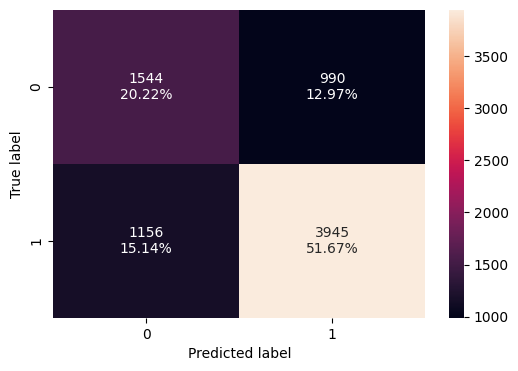

In [66]:
#Calculating different metrics
random_tuned_model_train_perf=model_performance_classification_sklearn(random_tuned,X_train,y_train)
print("Training performance:\n",random_tuned_model_train_perf)
random_tuned_model_test_perf=model_performance_classification_sklearn(random_tuned,X_test,y_test)
print("Testing performance:\n",random_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(random_tuned,X_test,y_test)

* Hyperparameter tuning has decreased the overfit and increased F1 score, however, this model is not performing as optimally as the hyperparameter tuned decision tree

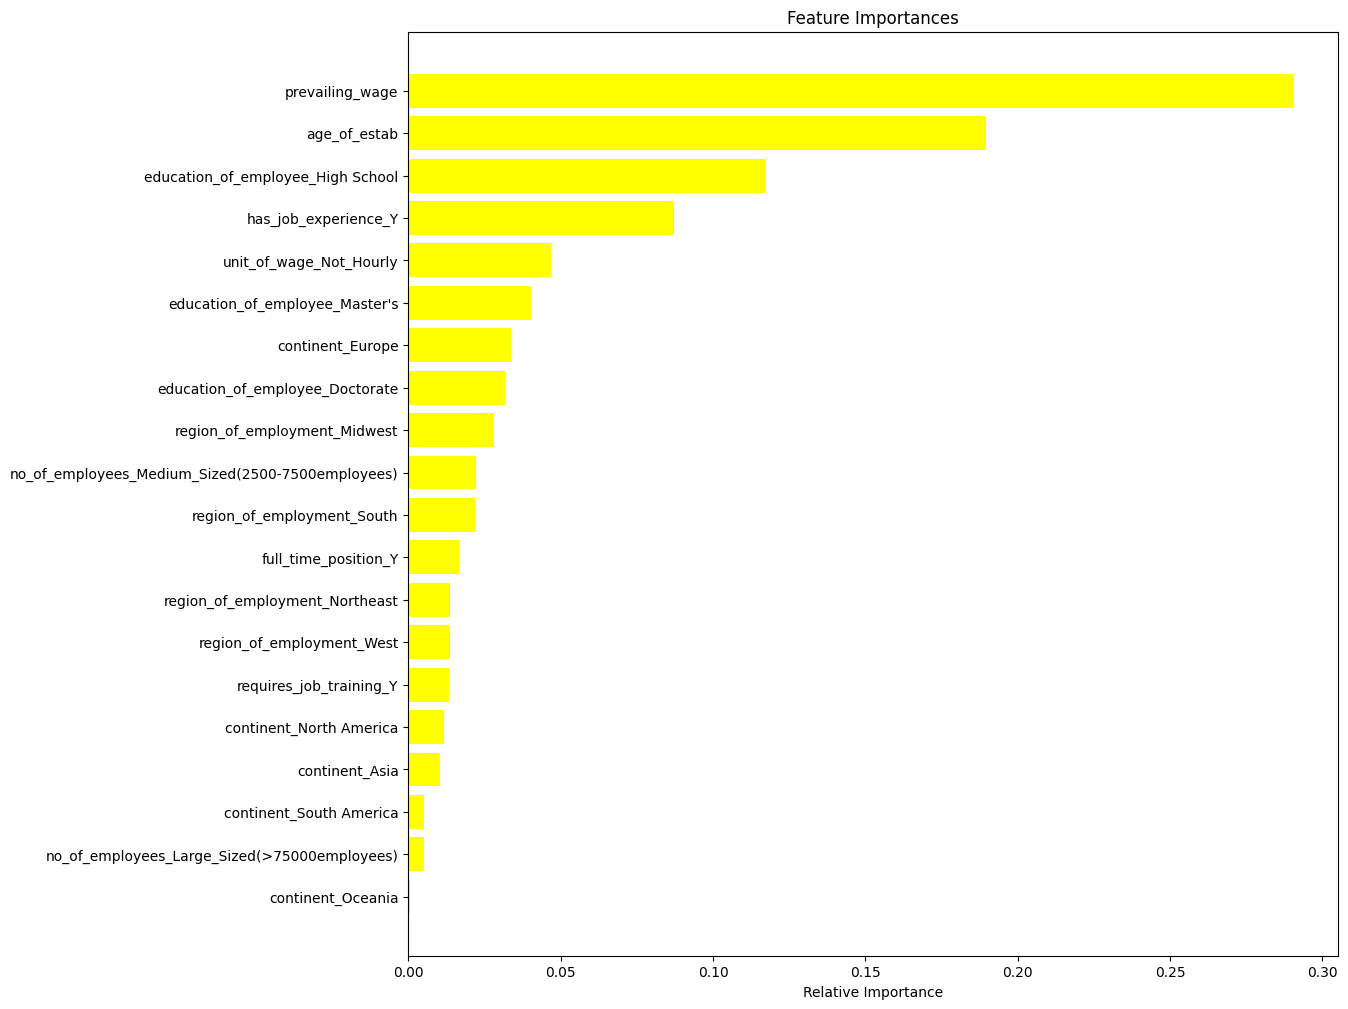

In [67]:
feature_names = X_train.columns
importances = random_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The feature is similar to the decision tree

## Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.982652  0.983613   0.990355  0.986972
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.69535  0.767889   0.774264  0.771063


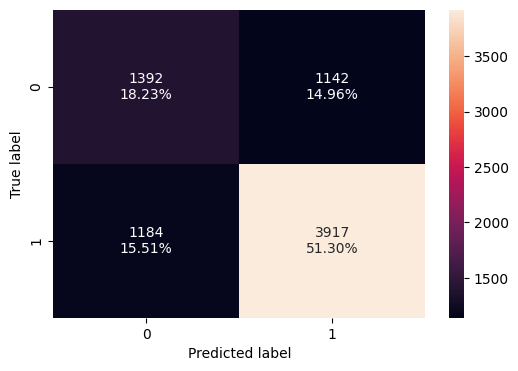

In [68]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n", bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is also overfiting the training data

In [69]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.980631  0.998403   0.973294  0.985689
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.726785  0.878259   0.753574  0.811153


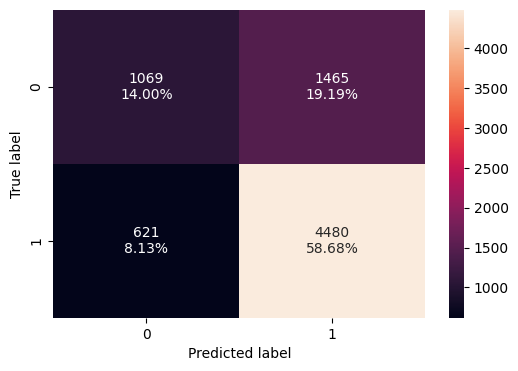

In [70]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* The model is still found to overfit the training data, as the training metrics are high but the testing metrics are not

## AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.739445  0.890168   0.760609  0.820304
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.736084  0.879239   0.762237  0.816568


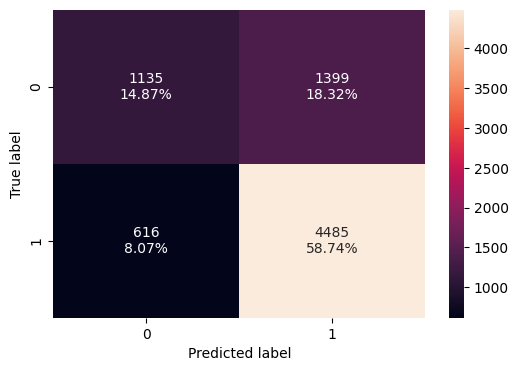

In [71]:
#Fitting the model
ada_classifier = AdaBoostClassifier(random_state=1)
ada_classifier.fit(X_train,y_train)

#Calculating different metrics
ada_classifier_model_train_perf=model_performance_classification_sklearn(ada_classifier,X_train,y_train)
print("Training performance:\n", ada_classifier_model_train_perf)
ada_classifier_model_test_perf=model_performance_classification_sklearn(ada_classifier,X_test,y_test)
print("Testing performance:\n", ada_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ada_classifier,X_test,y_test)

* Unlike the decision tree, random forest, or the bagging classifier; the AdaBoost classifier is not found to overfit the training data. It is giving a generalized performance on the training & testing data with a F1 score 0.82 & 0.816

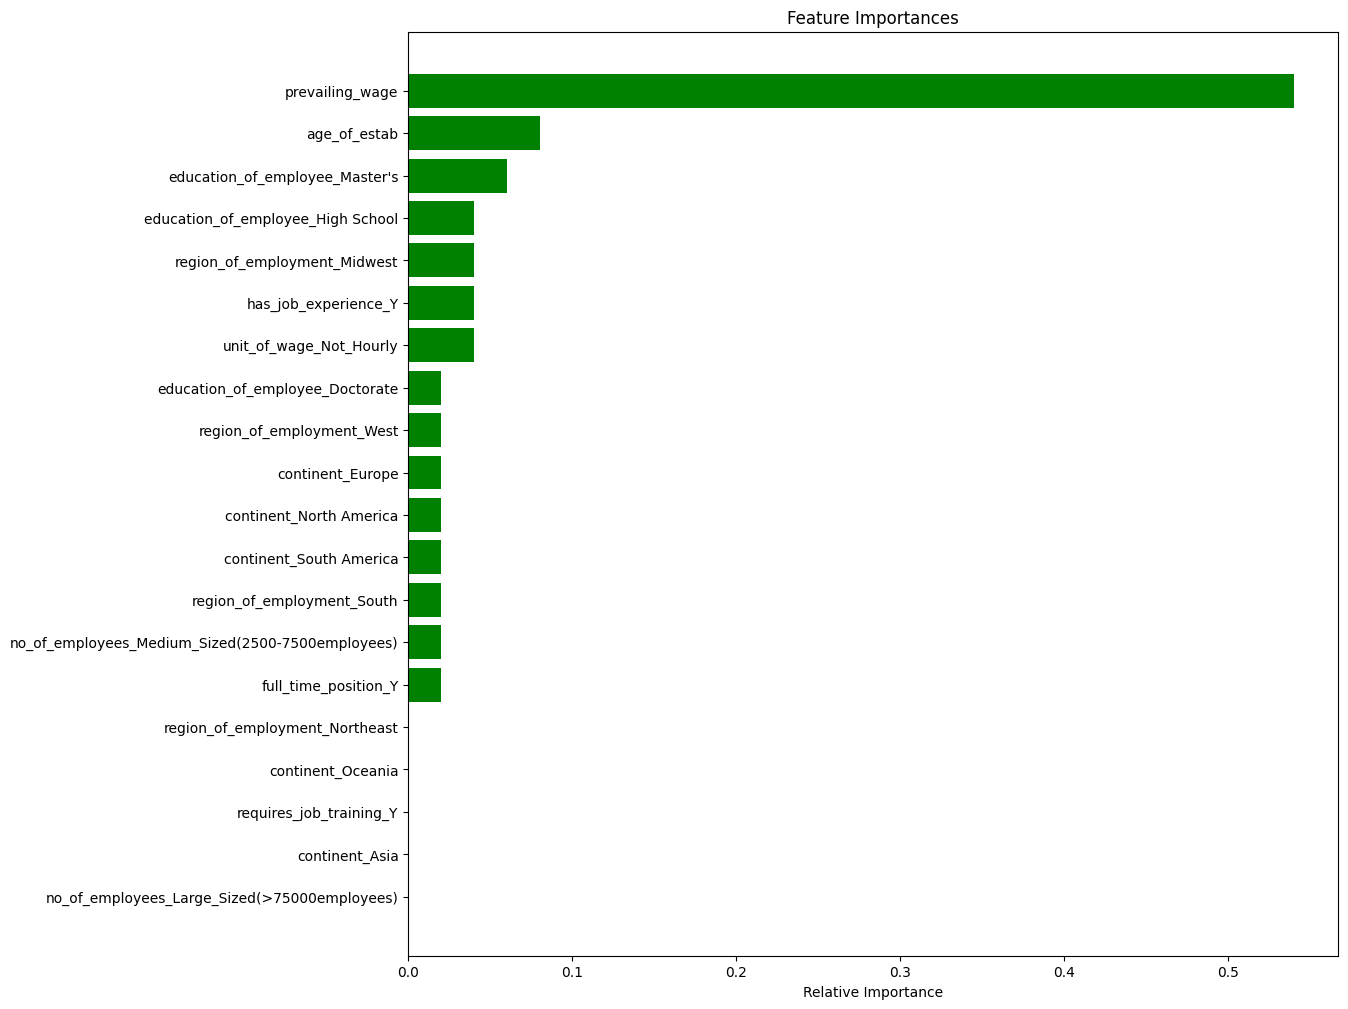

In [72]:
feature_names = X_train.columns
importances = ada_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## AdaBoost - Hyperparamter tuning

In [73]:
# Choose the type of classifier. 
ada_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),
                      DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(20,120,40),
    "learning_rate":np.arange(0.2,2,0.6)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ada_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ada_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=60, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.749382  0.877143   0.776637  0.823836
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746169  0.866301   0.778678  0.820156


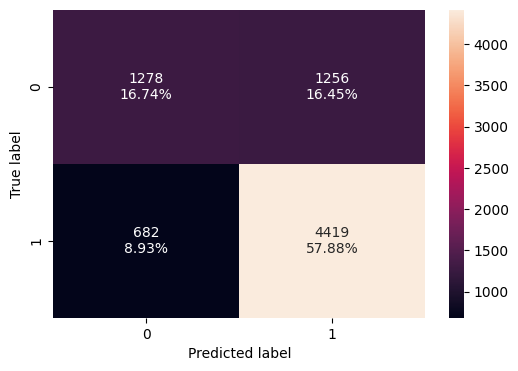

In [74]:
#Calculating different metrics
ada_tuned_model_train_perf=model_performance_classification_sklearn(ada_tuned,X_train,y_train)
print("Training performance:\n", ada_tuned_model_train_perf)
ada_tuned_model_test_perf=model_performance_classification_sklearn(ada_tuned,X_test,y_test)
print("Testing performance:\n", ada_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ada_tuned,X_test,y_test)

* The hyperparameter tuned model is giving similar performance to the default AdaBoost model

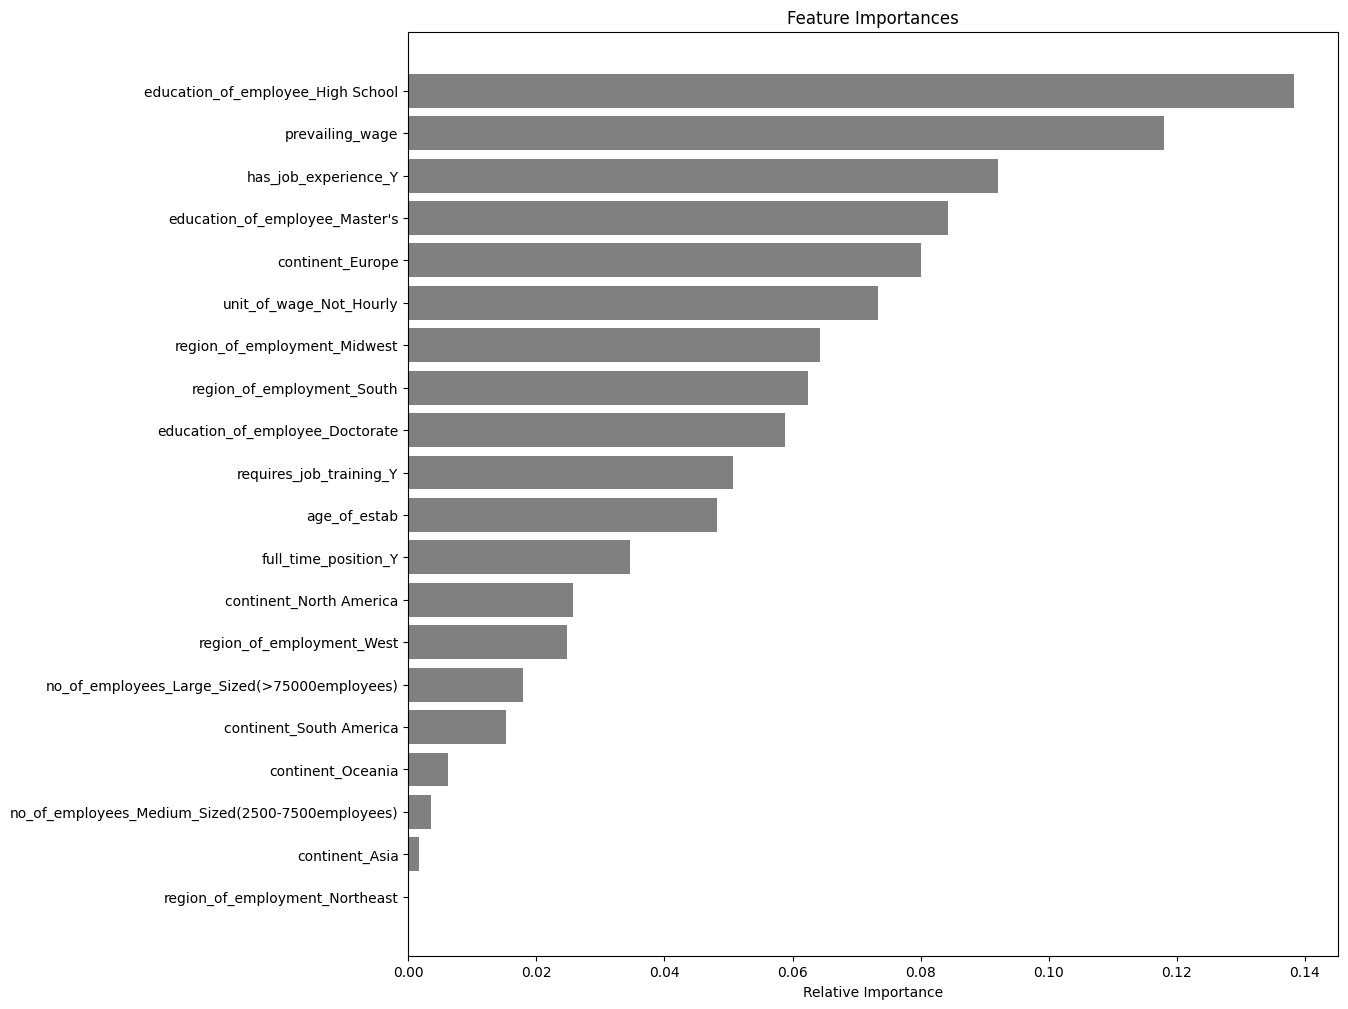

In [75]:
feature_names = X_train.columns
importances = ada_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='grey', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The top feature importance from Adaboost tuned are education of employee, prevailing wages and job experience

## Gradient Boosting Classifier

Training performance:
    Accuracy   Recall  Precision       F1
0  0.756232  0.87437   0.785165  0.82737
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.748527  0.86336   0.782655  0.821029


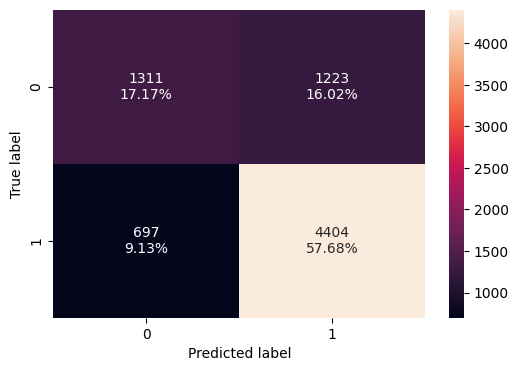

In [76]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting model is giving generalized performance on both the training and testing data with very high F1 scores of 0.827 and 0.821 respectively

## Gradient Boosting - Hyperparameter Tuning

In [77]:
# Choosing the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,175,250],
    "subsample":[0.8,1],
    "max_features":[0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=1)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.75567  0.875462   0.784016  0.827219
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.749443  0.865713   0.782424  0.821964


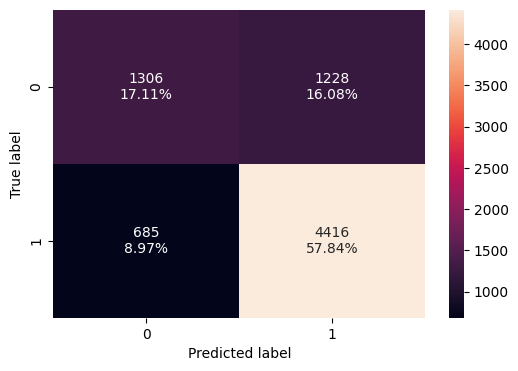

In [78]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* There is not much difference in the model performance after hyperparameter tuning

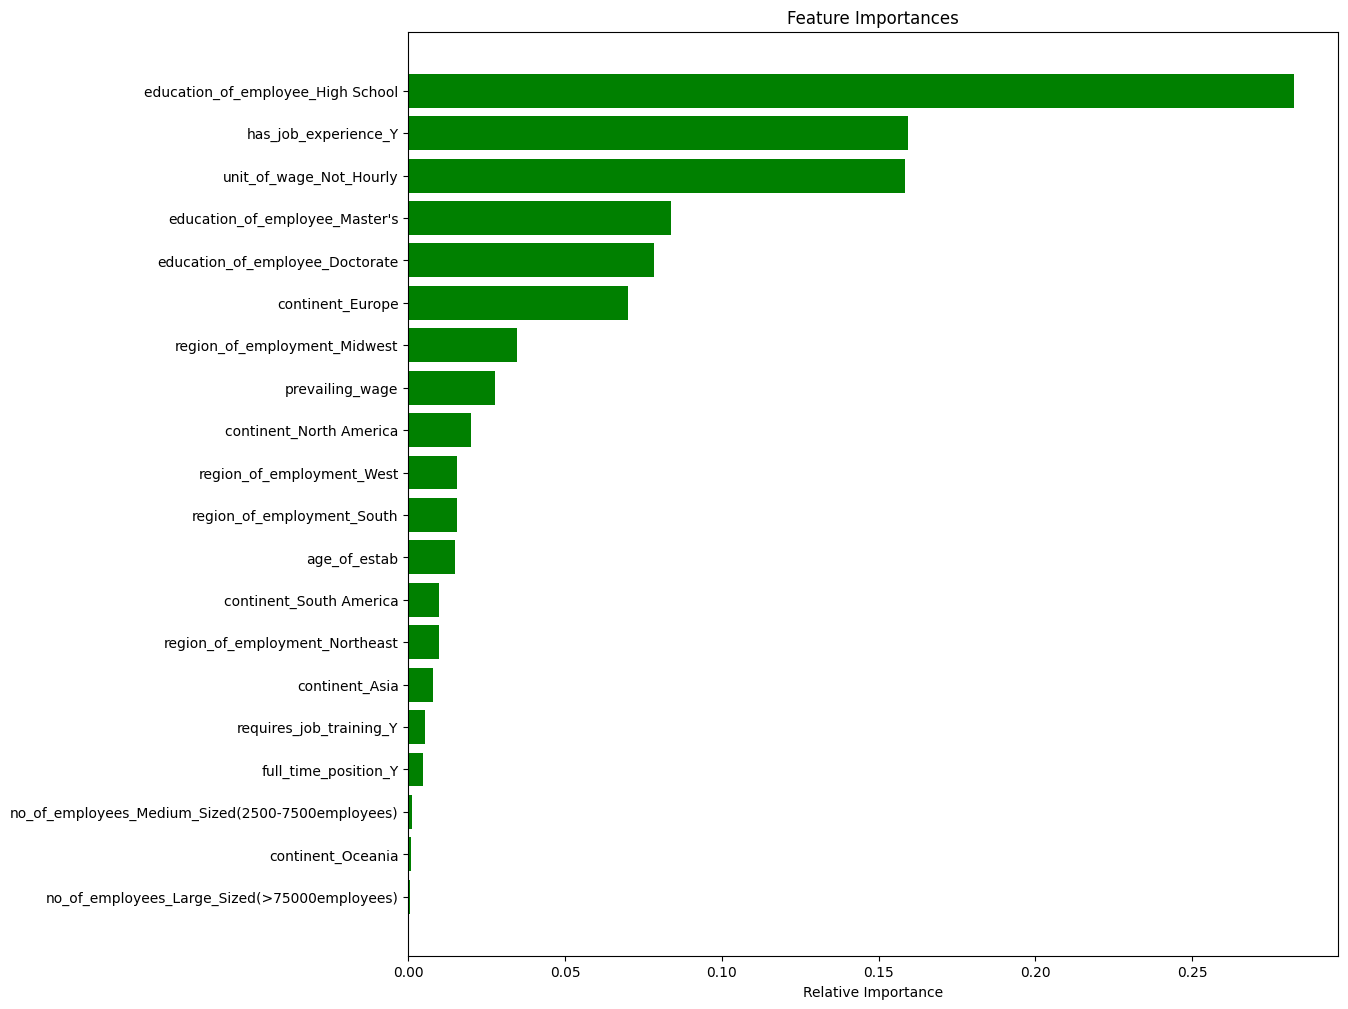

In [79]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* in the tuned gradient boosting education of employee high school has highest importance follow by job experience and unit of wages not hourly

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.822704  0.924286   0.829737  0.874463
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.731369  0.85493   0.768865  0.809617


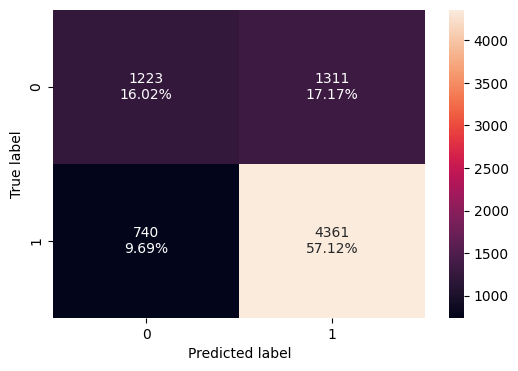

In [80]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* The XGBoost classifier is slightly overfitting the training data

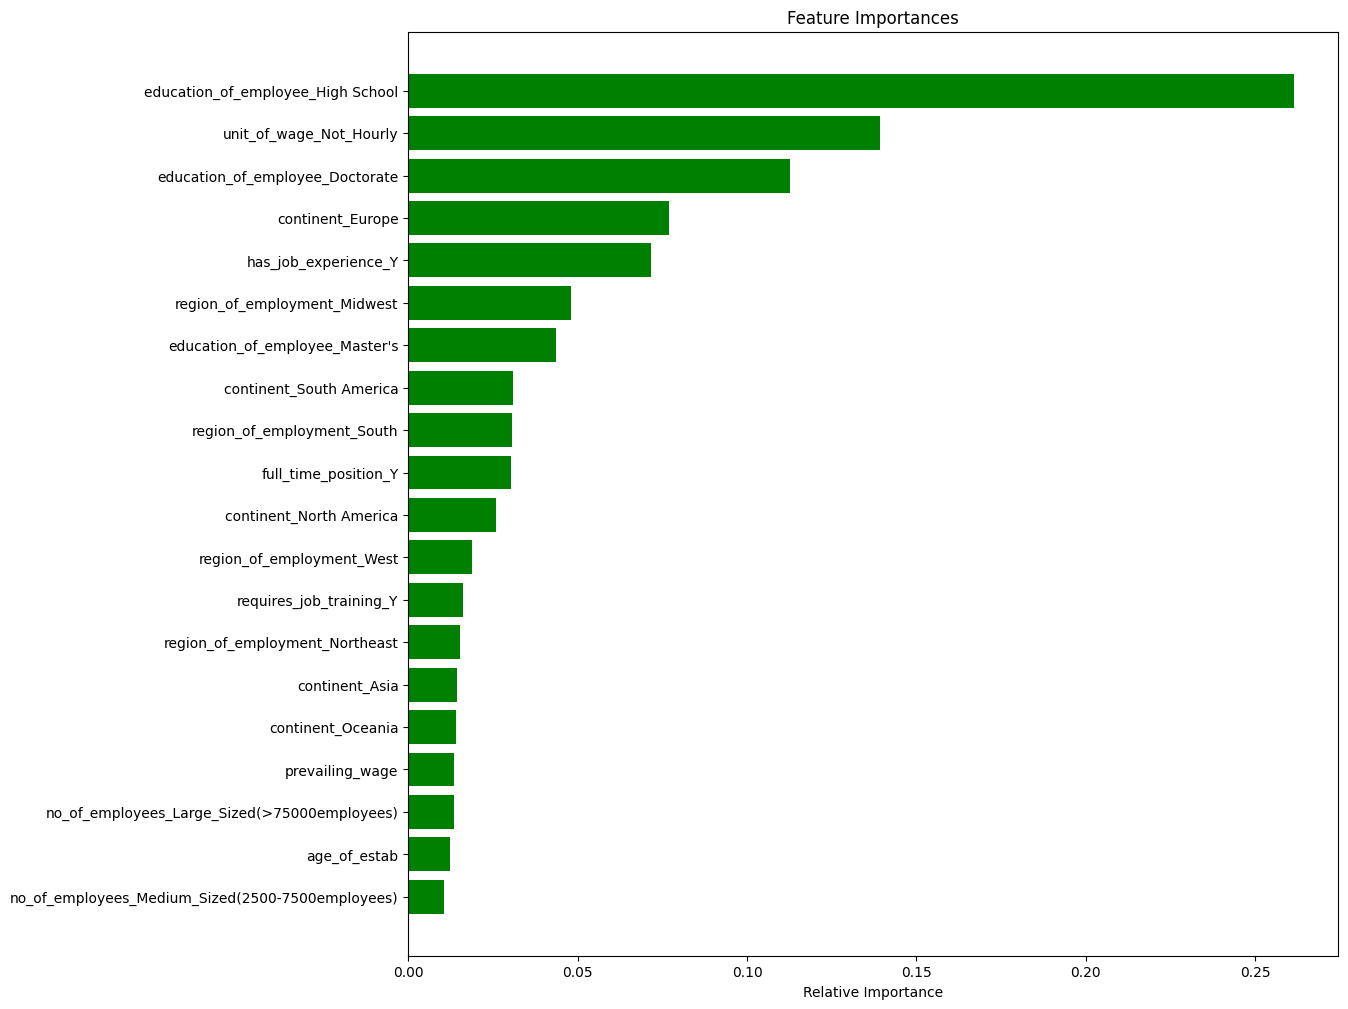

In [81]:
feature_names = X_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Performance Comparison and Conclusions

In [82]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_model_train_perf.T,decision_tree_estimator_model_train_perf.T,random_estimator_model_train_perf.T,random_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ada_classifier_model_train_perf.T,
     ada_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier"
    ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier
Accuracy,1.0,0.711599,0.999944,0.867561,0.982652,0.980631,0.739445,0.749382,0.756232,0.755670,0.822704
Recall,1.0,0.932605,1.000000,0.874538,0.983613,0.998403,0.890168,0.877143,0.874370,0.875462,0.924286
Precision,1.0,0.719108,0.999916,0.923179,0.990355,0.973294,0.760609,0.776637,0.785165,0.784016,0.829737
F1,1.0,0.812059,0.999958,0.898200,0.986972,0.985689,0.820304,0.823836,0.827370,0.827219,0.874463


In [83]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_model_test_perf.T,decision_tree_estimator_model_test_perf.T,random_estimator_model_test_perf.T,random_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ada_classifier_model_test_perf.T,
     ada_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier
Accuracy,0.654879,0.709103,0.712770,0.718926,0.695350,0.726785,0.736084,0.746169,0.748527,0.749443,0.731369
Recall,0.729465,0.929034,0.814350,0.773378,0.767889,0.878259,0.879239,0.866301,0.863360,0.865713,0.854930
Precision,0.747789,0.718248,0.769259,0.799392,0.774264,0.753574,0.762237,0.778678,0.782655,0.782424,0.768865
F1,0.738513,0.810155,0.791163,0.786170,0.771063,0.811153,0.816568,0.820156,0.821029,0.821964,0.809617


Observations

* The Tuned Gradient Boosting model slightly outperforms all other models in terms of F1-score.
* The Tuned Decision Tree, Tuned Bagging, Tuned Random Forest, AdaBoost, Tuned AdaBoost, Gradient Boosting, Tuned Gradient Boosting and XGBoost all provide close F1-scores (0.81-0.82).

## Actionable Insights and Recommendations

### Insights
Looking at the EDA and the models, the following features were identified as important for visas getting certified than denied

1. Education of employee: an employee with only a high school certififcation has over 65% chance of visa getting denied in comparison to an employee with a doctorate degree with over a 85% chance of visa getting certified

2. Unit of wage: an employee with an hourly pay likewise has over 65% chance of visa getting denied in comparison to an employee with a non-hourly pay with over 70% chance of visa getting certified

3. Continent the employee: if Europe, over 80% chance of visa getting certified, if the employee has prior job experience (over 75% chance of visa getting approved if an employee has prior work experience but 50% chance of visa getting denied if an employee has no work experience) are other important attributes

4. Likewise, the region of the US the employment opportunity is in is also an important deciding factor with over 70% cases getting certified if the region is Midwest or South

5. Attributes like if the job opportunity is full time/ part time ; if an employee requires further job training ; the annual prevailing wage of the occupation in the US ; age of establishment do not have much importance on a case getting certified vs denied



### Recommendation


1. From the above insights, OFLC shall particularly consider the applicants' level of education, their job experience, and their prevailing wage unit in its visa certification probability estimations. 
2. OFLC should prioritize the applicants who have a higher education, have job experience, and their US employment's wage unit is yearly. 
3. OFLC should also prioritize applicants from Europe.
4. It is recommended that OFLC should prioritizes the processing of the visa applications that have higher chances of certification based on the developed classification models.
5. To minimize the waste of OFLC's resources, it could quickly deny the applications that have very high chances of denial based on the prediction models.
